In [1]:
import naverAPI as napi
import json
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os

In [16]:
current_dir = os.getcwd()
#print(current_dir)
dotenv_path = os.path.join(current_dir, '.env')
load_dotenv(dotenv_path=dotenv_path)
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

categroy_json = pd.read_json('output/naverCategoryTable.json')
df_category = pd.DataFrame(categroy_json)
food = df_category[df_category['p_id'] == 50000006] # 음식 카테고리
b = food[['id','name']].to_dict('tight')
to_be_found = np.array(b['data'])
test_category_list = napi.listToCategoryDict(to_be_found)
print(test_category_list)
res = napi.createTrendData(client_id, client_secret, test_category_list, "2025-10-02", "2025-10-09")


[{'name': np.str_('축산물'), 'param': ['50000145']}, {'name': np.str_('수산물'), 'param': ['50000159']}, {'name': np.str_('농산물'), 'param': ['50000160']}, {'name': np.str_('반찬'), 'param': ['50000146']}, {'name': np.str_('김치'), 'param': ['50000147']}, {'name': np.str_('음료'), 'param': ['50000148']}, {'name': np.str_('과자/베이커리'), 'param': ['50000149']}, {'name': np.str_('유가공품'), 'param': ['50000150']}, {'name': np.str_('냉동/간편조리식품'), 'param': ['50000026']}, {'name': np.str_('건강식품'), 'param': ['50000023']}, {'name': np.str_('다이어트식품'), 'param': ['50000024']}, {'name': np.str_('통조림/캔'), 'param': ['50011940']}, {'name': np.str_('제과/제빵재료'), 'param': ['50012460']}, {'name': np.str_('조미료'), 'param': ['50012520']}, {'name': np.str_('식용유/오일'), 'param': ['50012620']}, {'name': np.str_('소스/드레싱'), 'param': ['50012782']}, {'name': np.str_('가루/분말류'), 'param': ['50013360']}, {'name': np.str_('잼/시럽'), 'param': ['50013520']}, {'name': np.str_('라면/면류'), 'param': ['50013960']}, {'name': np.str_('장류'), 'param': ['500

In [3]:
with open('output/res_temp.json', 'w', encoding='utf-8') as f:
            json.dump(res, f, ensure_ascii=False, indent=4)
    

In [4]:
with open('output/res_temp.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
datalist=data['datalist']
data

{'startdate': '2025-10-02',
 'enddate': '2025-10-09',
 'datalist': [{'title': '축산물',
   'category': ['50000145'],
   'data': [{'period': '2025-10-02', 'ratio': 34.36252990068879},
    {'period': '2025-10-03', 'ratio': 28.092679805876664},
    {'period': '2025-10-04', 'ratio': 23.503983589730456},
    {'period': '2025-10-05', 'ratio': 20.808697971536578},
    {'period': '2025-10-06', 'ratio': 19.03942170044545},
    {'period': '2025-10-07', 'ratio': 20.56579423825982},
    {'period': '2025-10-08', 'ratio': 21.452729206857327},
    {'period': '2025-10-09', 'ratio': 25.05870818959138}]},
  {'title': '수산물',
   'category': ['50000159'],
   'data': [{'period': '2025-10-02', 'ratio': 37.622163012942},
    {'period': '2025-10-03', 'ratio': 32.48138412787868},
    {'period': '2025-10-04', 'ratio': 29.151254606571815},
    {'period': '2025-10-05', 'ratio': 27.158235569826417},
    {'period': '2025-10-06', 'ratio': 27.560901818337634},
    {'period': '2025-10-07', 'ratio': 29.958882055538034},
  

In [5]:
data_period = []
data_ratio = []
data_title = []
for dd in datalist:
    data_title.append(dd['title'])
    temp = []
    temp1 = []
    for ddd in dd['data']:
        temp.append(ddd['ratio'])
        temp1.append(ddd['period'])
    data_ratio.append(temp)
    data_period.append(temp1)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

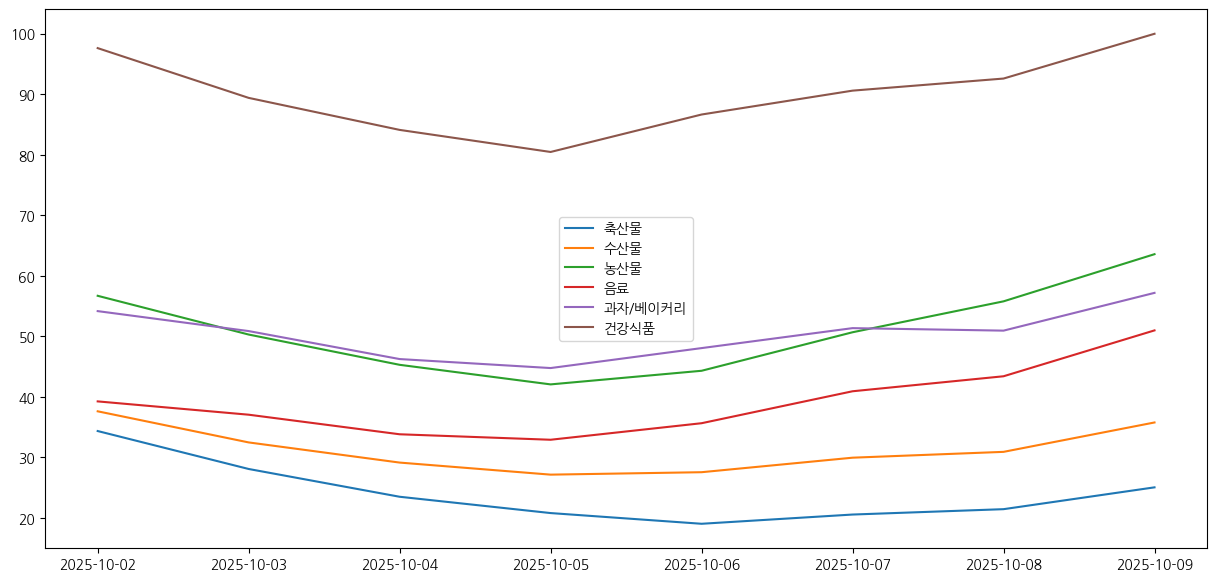

In [7]:

plt.figure(figsize=(15,7))
for i, title in enumerate(data_title):
    if max(data_ratio[i]) > 30:
        plt.plot(data_period[i], data_ratio[i], label=title)
plt.legend()
plt.show()

23


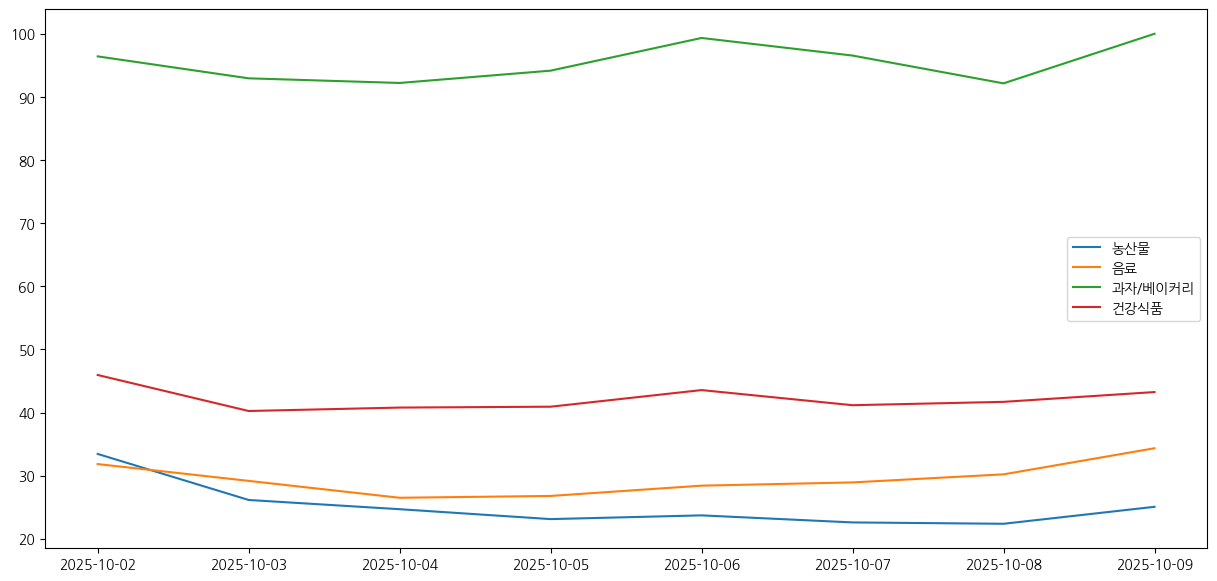

In [15]:
food = df_category[df_category['p_id'] == 50000006] # 음식 카테고리
b = food[['id','name']].to_dict('tight')
to_be_found = np.array(b['data'])
test_category_list = napi.listToCategoryDict(to_be_found)
print(len(test_category_list))
res = napi.createTrendData(client_id, client_secret, test_category_list, "2025-10-02", "2025-10-09", gender='f', ages=['10', '20'])

with open('output/res_temp.json', 'w', encoding='utf-8') as f:
            json.dump(res, f, ensure_ascii=False, indent=4)

datalist=res['datalist']
data_period = []
data_ratio = []
data_title = []
for dd in datalist:
    data_title.append(dd['title'])
    temp = []
    temp1 = []
    for ddd in dd['data']:
        temp.append(ddd['ratio'])
        temp1.append(ddd['period'])
    data_ratio.append(temp)
    data_period.append(temp1)


plt.figure(figsize=(15,7))
for i, title in enumerate(data_title):
    if max(data_ratio[i]) > 30:
        plt.plot(data_period[i], data_ratio[i], label=title)
plt.legend()
plt.show()
